In [28]:
import ephem
import sys
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
sys.path.append('../')

from sky import *

edi = ephem.city("Edinburgh")
edi.date = datetime(2017, 6, 21, 10, 0, 0)
sky = SkyModel(edi)
sky.generate()
lon, lat = sun2lonlat(sky.sun)

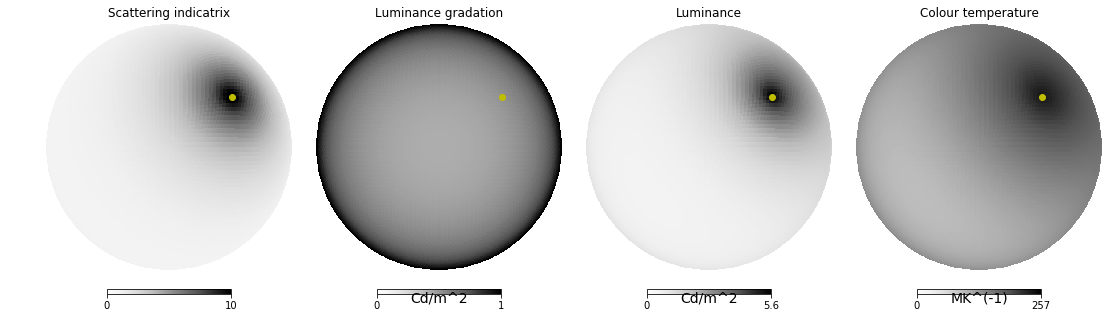

In [22]:
SkyModel.plot_luminance(sky)

In [112]:
E = sky.L

I_0 = np.square(E)
print "I_0", I_0.min(), I_0.max()

# 0 deg polarisation
theta = sky.phi_s + np.pi/2
# E_x, E_y = E * np.sin(theta), E * np.cos(theta)
I_1 = I_0 * np.square(np.cos(theta)) * 2 * rayleigh(sky.theta_s)
print "I_1", I_0.min(), I_0.max()

# 60 deg polarisation
theta = sky.phi_s + np.pi/3 + np.pi/2
# E_x, E_y = E * np.sin(theta), E * np.cos(theta)
I_2 = I_0 * np.square(np.cos(theta)) * 2 * rayleigh(sky.theta_s)
print "I_2", I_0.min(), I_0.max()

# 120 deg polarisation
theta = sky.phi_s - np.pi/3 + np.pi/2
# E_x, E_y = E * np.sin(theta), E * np.cos(theta)
I_3 = I_0 * np.square(np.cos(theta)) * 2 * rayleigh(sky.theta_s)
print "I_3", I_0.min(), I_0.max()

I_0 0.0 32.2347927748
I_1 0.0 32.2347927748
I_2 0.0 32.2347927748
I_3 0.0 32.2347927748


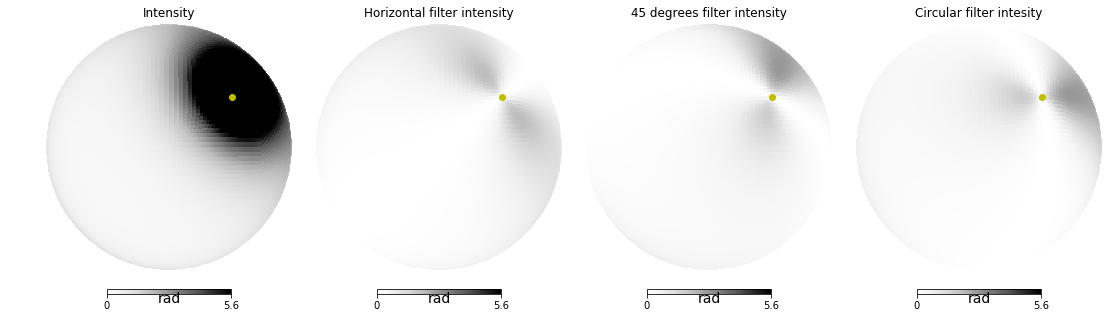

In [113]:
plt.figure(2, figsize=(15, 5))
hp.orthview(I_0, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="Intensity", unit=r'rad', sub=(1,4,1), fig=2)
hp.orthview(I_1, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="Horizontal filter intensity", unit=r'rad', sub=(1,4,2), fig=2)
hp.orthview(I_2, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="45 degrees filter intensity", unit=r'rad', sub=(1,4,3), fig=2)
hp.orthview(I_3, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="Circular filter intesity", unit=r'rad', sub=(1,4,4), fig=2)
hp.projplot(lat, lon, 'yo')
plt.show()

In [123]:
I = I_0
# I = 2./3. * (I_1 + I_2 + I_3)
print "I", I.min(), I.max()
Q = 2./3. * (2 * I_1 - I_2 - I_3)
print "Q", Q.min(), Q.max()
U = 2./np.sqrt(3) * (I_2 - I_3)
print "U", U.min(), U.max()
V = np.zeros_like(I_1)
print "V", V.min(), V.max()

I 0.0 32.2347927748
Q -2.93596449317 2.07569049924
U -2.57663158843 2.58348354643
V 0.0 0.0


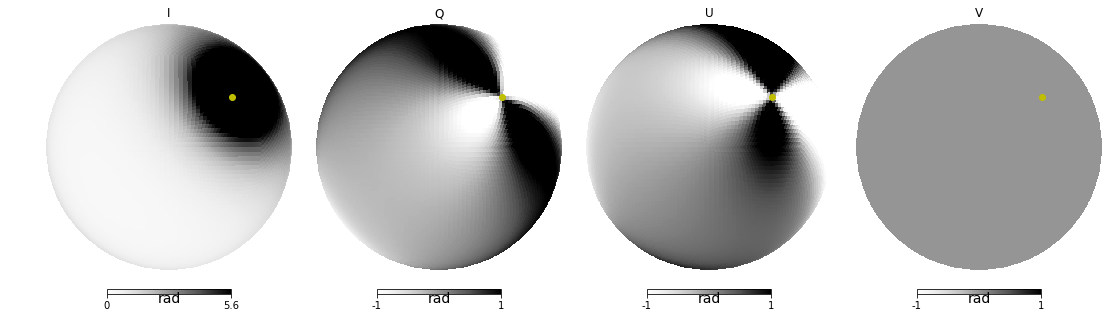

In [124]:
plt.figure(3, figsize=(15, 5))
hp.orthview(I, rot=sky.VIEW_ROT, min=0, max=5.6, flip="geo", cmap="Greys", half_sky=True,
               title="I", unit=r'rad', sub=(1,4,1), fig=3)
hp.orthview(Q, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="Q", unit=r'rad', sub=(1,4,2), fig=3)
hp.orthview(U, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="U", unit=r'rad', sub=(1,4,3), fig=3)
hp.orthview(V, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="V", unit=r'rad', sub=(1,4,4), fig=3)
hp.projplot(lat, lon, 'yo')
plt.show()

In [125]:
DOP = np.zeros_like(I)
DOP[I > 0] = np.sqrt(np.square(Q[I > 0]) + np.square(U[I > 0])) / I[I > 0]
print "DOP", DOP.min(), DOP.max()
AOP = .5 * np.arctan2(U, Q)
print "AOP", AOP.min(), AOP.max()

DOP 0.0 0.772258699392
AOP -1.57035406235 1.57012350181


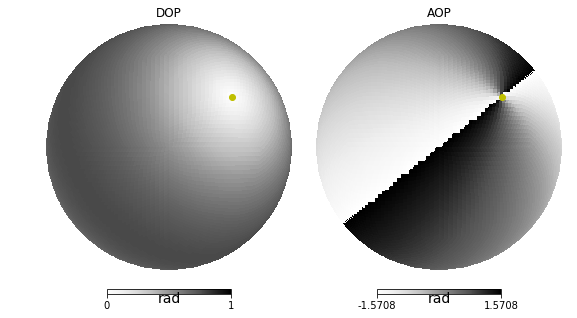

In [126]:
plt.figure(4, figsize=(15, 5))
hp.orthview(DOP, rot=sky.VIEW_ROT, min=0, max=1, flip="geo", cmap="Greys", half_sky=True,
               title="DOP", unit=r'rad', sub=(1,4,1), fig=3)
hp.orthview(AOP, rot=sky.VIEW_ROT, min=-np.pi/2, max=np.pi/2, flip="geo", cmap="Greys", half_sky=True,
               title="AOP", unit=r'rad', sub=(1,4,2), fig=3)
# hp.orthview(U, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
#                title="U", unit=r'rad', sub=(1,4,3), fig=3)
# hp.orthview(V, rot=sky.VIEW_ROT, min=-1, max=1, flip="geo", cmap="Greys", half_sky=True,
#                title="V", unit=r'rad', sub=(1,4,4), fig=3)
hp.projplot(lat, lon, 'yo')
plt.show()

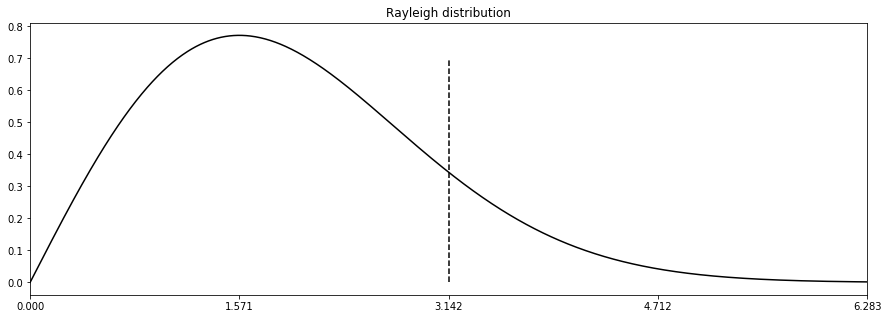

In [129]:
plt.figure(5, figsize=(15, 5))
x = np.linspace(0, 2 * np.pi, 1000, endpoint=True)
plt.plot(x, 2 * rayleigh(x), 'k-')
plt.plot([np.pi, np.pi], [0, .7], 'k--')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
plt.xlim([0,2*np.pi])
plt.title("Rayleigh distribution")
plt.show()